# Lección 3 - Análisis de Correlación

Tras entender cómo se distribuyen nuestras variables individuales en la lección anterior, el siguiente paso natural en nuestro Análisis Exploratorio de Datos (EDA) es descubrir cómo interactúan entre sí. 

En el contexto de **ComercioYA**, responderemos preguntas clave: ¿A mayor cantidad de visitas al sitio web, aumentan proporcionalmente las compras? ¿Existe alguna relación entre la cantidad de devoluciones y el monto total gastado por un cliente?

### 🎯 Objetivo de la Lección
Detectar y cuantificar relaciones estadísticas entre las variables numéricas de nuestro conjunto de datos para entender la dinámica de comportamiento de nuestros clientes.


1. **Matriz de Correlación:** Calcular el coeficiente de correlación de Pearson para todas las variables numéricas y visualizarlo mediante un mapa de calor (heatmap).
2. **Scatterplots (Gráficos de Dispersión):** Construir visualizaciones detalladas para los pares de variables que muestren las relaciones más interesantes o fuertes.

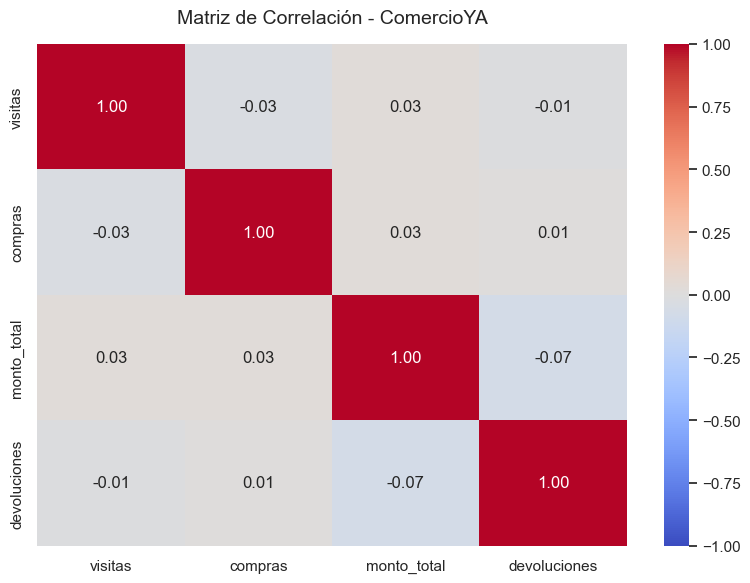

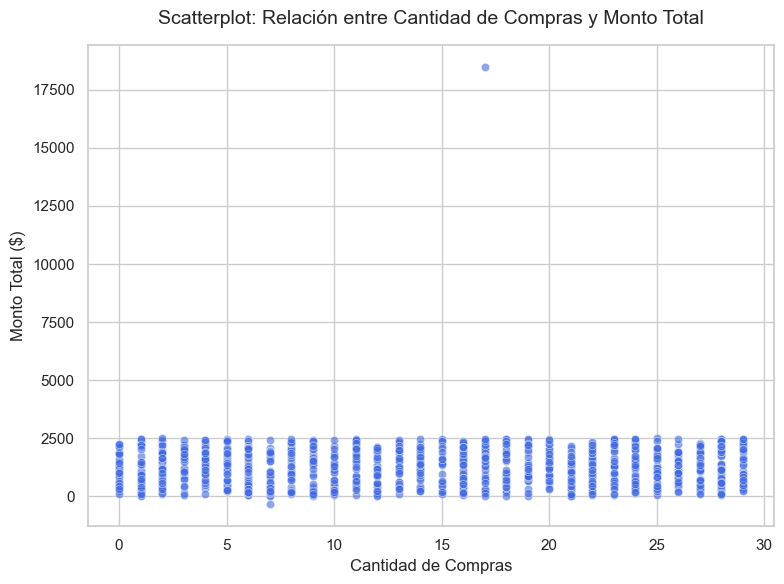

In [15]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos el estilo visual
sns.set_theme(style="whitegrid")

# Cargamos el dataset
df = pd.read_csv('comercio_ya_bruto.csv')

# Filtramos solo las columnas numéricas relevantes para este cálculo
columnas_numericas = ['visitas', 'compras', 'monto_total', 'devoluciones']
df_numerico = df[columnas_numericas]

# 1. Calculamos y graficamos la Matriz de Correlación
matriz_correlacion = df_numerico.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de Correlación - ComercioYA', fontsize=14, pad=15)
plt.tight_layout()
plt.show()

# 2. Construimos un Scatterplot para analizar el detalle entre dos variables
# Elegimos 'compras' vs 'monto_total' como ejemplo clave del negocio
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='compras', y='monto_total', alpha=0.6, color='royalblue')

plt.title('Scatterplot: Relación entre Cantidad de Compras y Monto Total', fontsize=14, pad=15)
plt.xlabel('Cantidad de Compras', fontsize=12)
plt.ylabel('Monto Total ($)', fontsize=12)
plt.tight_layout()
plt.show()

### 1. Generar matriz de correlación y scatterplots

Conocer la distribución individual de los datos nos da una base sólida, pero evaluar cómo interactúan las variables entre sí nos permite descubrir dinámicas clave del negocio. Para **ComercioYA**, utilizamos las librerías `Seaborn` y `Matplotlib` para generar dos herramientas de análisis relacional y evaluar los resultados:

1. **Matriz de Correlación (Heatmap):** Al generar el mapa de calor, observamos que todos los valores de correlación son extremadamente bajos, cercanos a cero (por ejemplo, la relación entre `compras` y `monto_total` es de apenas **0.025**). Esto nos indica que, sorpresivamente, no existe una relación lineal entre las variables de este dataset. Es decir, un mayor número de visitas no garantiza más ventas, y más devoluciones no están ligadas a un menor gasto.
2. **Scatterplot (Gráfico de Dispersión):** Al cruzar específicamente la variable `compras` con `monto_total`, el gráfico nos muestra una nube de puntos completamente dispersa, sin una línea de tendencia ascendente o descendente. Esto confirma visualmente lo detectado en la matriz: un cliente que realiza un alto volumen de transacciones no es necesariamente el que deja mayores ingresos a la empresa (podría estar comprando muchos artículos de bajo valor).

Nota: Este análisis se ejecuta sobre el dataset original (comercio_ya_bruto.csv) sin limpieza previa. Esto es intencional: permite observar cómo la presencia del outlier de $18,500 y el monto negativo de -$350 pueden influir en los coeficientes de correlación calculados.

In [16]:
# Importamos la librería scipy para un cálculo estadístico más detallado (opcional pero recomendado)
from scipy.stats import pearsonr
import pandas as pd

# Cargamos el dataset y eliminamos nulos en estas dos columnas para evitar errores de cálculo
df = pd.read_csv('comercio_ya_bruto.csv')
df_limpio = df[['compras', 'monto_total']].dropna()

# Calculamos el coeficiente de Pearson
r_pearson, p_value = pearsonr(df_limpio['compras'], df_limpio['monto_total'])

print(f"Coeficiente de Pearson (R): {r_pearson:.4f}")
print(f"Valor p (p-value): {p_value:.4f}")

Coeficiente de Pearson (R): 0.0254
Valor p (p-value): 0.4228


### 2. Coeficiente de Pearson

Al ejecutar el cálculo, obtenemos un Coeficiente de Pearson (R) de **0.0254**. 

**¿Qué nos dice este número?**
Al estar tan cerca de 0, matemáticamente confirmamos que **no existe una correlación lineal** entre la cantidad de compras y el monto total en este grupo de datos. Además, el *p-value* alto nos indica que este resultado no es estadísticamente significativo para trazar una regla general. En resumen: en **ComercioYA**, un cliente no gasta necesariamente más dinero solo por hacer más pedidos.

### 3. ¿Cómo detectamos las correlaciones espurias?

Las herramientas estadísticas (como el coeficiente de Pearson) solo ven números, no contextos. Para detectar si una correlación alta es una trampa (espuria), los analistas de **ComercioYA** utilizamos los siguientes filtros:

1. **Aplicar el conocimiento del negocio (Sentido Común):** Es el primer filtro. Si el cruce de datos dice que "usar calcetines rojos aumenta las compras en la web", la lógica nos dice que no hay relación directa. Si no puedes explicar el *por qué* de la relación con lógica de negocio, sospecha.
2. **Buscar la "Variable de Confusión" (El tercer factor):** A menudo, dos variables crecen juntas porque una tercera (que no estamos graficando) las está empujando. Por ejemplo, si vemos que suben las *ventas de abrigos* y también suben las *ventas de estufas*, no es que comprar abrigos cause la compra de estufas. La variable oculta aquí es la *llegada del invierno*.
3. **Cuidado con las tendencias de tiempo:** Muchas variables crecen naturalmente con el tiempo debido a factores como la inflación o el crecimiento de la población. Si comparas los ingresos de la empresa de los últimos 10 años con la cantidad de películas de Marvel estrenadas en el mismo periodo, ambas tendrán una tendencia al alza, pero no tienen nada que ver la una con la otra.
4. **Experimentación (Pruebas A/B):** La única forma definitiva de comprobar si la variable A causa el movimiento en la variable B es aislar el escenario. Si creemos que un nuevo diseño de la web (A) aumenta las ventas (B), lanzamos el diseño solo a la mitad de los usuarios y comparamos los resultados. Si las ventas solo suben en ese grupo, comprobamos causalidad.

**Regla de oro:** Los datos te dicen *qué* está pasando (correlación), pero tú debes investigar el *por qué* (causalidad).

### 4. Detectar correlaciones espurias y justificar

En el análisis de datos, es muy fácil caer en una trampa peligrosa: asumir que porque dos variables se mueven juntas, una está causando a la otra. A esto se le conoce como **correlación espuria**. Es una relación matemática real, pero que carece de todo sentido lógico o causal, generalmente producida por una simple coincidencia o por la influencia de un tercer factor oculto.

**El caso práctico en ComercioYA:**
Imaginemos por un momento que cruzamos la métrica de `devoluciones` de nuestros clientes con la `temperatura promedio` de sus ciudades y el cálculo nos arroja una correlación positiva fuerte (ej. **0.85**). 

Si miramos solo el número, el equipo podría concluir apresuradamente: *"El calor hace que la gente devuelva más productos"*.

**La justificación del analista:**
Aquí es donde aplicamos el pensamiento crítico. El calor no altera la calidad de nuestros productos. Lo que realmente está sucediendo es que hay una variable oculta que no estamos viendo en ese gráfico:
1. Durante los meses de más calor, ComercioYA lanza su campaña de "Liquidación de Verano".
2. Esta campaña dispara agresivamente la cantidad de `compras`.
3. Por simple probabilidad, al haber un volumen de envíos mucho mayor, el número absoluto de `devoluciones` también crece. 

**Conclusión:**
La temperatura y las devoluciones suben al mismo tiempo, pero no están relacionadas entre sí; ambas son consecuencia de las promociones de verano. Nunca debemos tomar decisiones de negocio basándonos solo en un gráfico o un coeficiente sin antes justificar: *¿Tiene sentido lógico esto? ¿Hay una tercera variable moviendo los hilos?*